In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt


# DATA SOURCE --------------------------------------------------

batch_size = 20

epochs = 100

train_data_dir = 'butterflies'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(
        rescale=1./255)

data_train = train_datagen.flow_from_directory(
        train_data_dir + "/train",
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

data_validation = validation_datagen.flow_from_directory(
        train_data_dir + "/validation",
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

# for the comparison of data augmentation configurations

no_effect_datagen = ImageDataGenerator(
        rescale=1./255)

large_effect_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rotation_range=90,
        fill_mode="reflect")

no_effect_data_train = no_effect_datagen.flow_from_directory(
        train_data_dir + "/train",
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

large_effect_data_train = large_effect_datagen.flow_from_directory(
        train_data_dir + "/train",
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 624 images belonging to 7 classes.
Found 35 images belonging to 7 classes.
Found 624 images belonging to 7 classes.
Found 624 images belonging to 7 classes.


# Quantity of layers, Adadelta optimizer

In [3]:
# few layers, default optimizer
# MODEL --------------------------------------------------

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(7, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history1 = model1.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model1.save("models/few_adadelta")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
32/32 [==============================] - 16s 487ms/step - loss: 1.9441 - accuracy: 0.1651 - val_loss: 1.9063 - val_accuracy: 0.2286
Epoch 2/100
32/32 [==============================] - 15s 466ms/step - loss: 1.8815 - accuracy: 0.2997 - val_loss: 1.8652 - val_accuracy: 0.2286
Epoch 3/100
32/32 [==============================] - 14s 430ms/step - loss: 1.8488 - accuracy: 0.3013 - val_loss: 1.8282 - val_accuracy: 0.2571
Epoch 4/100
32/32 [==============================] - 14s 426ms/step - loss: 1.8110 - accuracy: 0.2949 - val_loss: 1.7914 - val_accuracy: 0.2857
Epoch 5/100
32/32 [==============================] - 14s 439ms/step - loss: 1.7751 - accuracy: 0.3670 - val_loss: 1.7550 - val_accuracy: 0.3143
Epoch 6/100
32/32 [==============================] - 15s 455ms/step - loss: 1.7463 - accuracy: 0.3926 - val_loss: 1.7210 - val_accuracy: 0.3143
Epoch 7/100
32/32 [==============================] - 17s 545

Epoch 56/100
32/32 [==============================] - 14s 436ms/step - loss: 0.9742 - accuracy: 0.7869 - val_loss: 0.8979 - val_accuracy: 0.8571
Epoch 57/100
32/32 [==============================] - 15s 461ms/step - loss: 0.9701 - accuracy: 0.7756 - val_loss: 0.8933 - val_accuracy: 0.8286
Epoch 58/100
32/32 [==============================] - 14s 422ms/step - loss: 0.9670 - accuracy: 0.7740 - val_loss: 0.8840 - val_accuracy: 0.8571
Epoch 59/100
32/32 [==============================] - 14s 425ms/step - loss: 0.9613 - accuracy: 0.7885 - val_loss: 0.8763 - val_accuracy: 0.8571
Epoch 60/100
32/32 [==============================] - 14s 441ms/step - loss: 0.9443 - accuracy: 0.7933 - val_loss: 0.8705 - val_accuracy: 0.8571
Epoch 61/100
32/32 [==============================] - 14s 433ms/step - loss: 0.9526 - accuracy: 0.7740 - val_loss: 0.8659 - val_accuracy: 0.8571
Epoch 62/100
32/32 [==============================] - 14s 427ms/step - loss: 0.9398 - accuracy: 0.7869 - val_loss: 0.8583 - val_ac

In [5]:
# medium layers, default optimizer
# MODEL --------------------------------------------------

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(7, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history2 = model2.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model2.save("models/medium_adadelta")

Epoch 1/100
32/32 [==============================] - 25s 782ms/step - loss: 1.9639 - accuracy: 0.1554 - val_loss: 1.9132 - val_accuracy: 0.1714
Epoch 2/100
32/32 [==============================] - 25s 769ms/step - loss: 1.9298 - accuracy: 0.1843 - val_loss: 1.8882 - val_accuracy: 0.2000
Epoch 3/100
32/32 [==============================] - 25s 775ms/step - loss: 1.9039 - accuracy: 0.2147 - val_loss: 1.8733 - val_accuracy: 0.2000
Epoch 4/100
32/32 [==============================] - 24s 758ms/step - loss: 1.8960 - accuracy: 0.2019 - val_loss: 1.8500 - val_accuracy: 0.2000
Epoch 5/100
32/32 [==============================] - 25s 785ms/step - loss: 1.8611 - accuracy: 0.2404 - val_loss: 1.8292 - val_accuracy: 0.2286
Epoch 6/100
32/32 [==============================] - 24s 761ms/step - loss: 1.8387 - accuracy: 0.2580 - val_loss: 1.8101 - val_accuracy: 0.2571
Epoch 7/100
32/32 [==============================] - 25s 774ms/step - loss: 1.8123 - accuracy: 0.2708 - val_loss: 1.7869 - val_accuracy:

In [7]:
# many layers, default optimizer
# MODEL --------------------------------------------------

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(7, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history3 = model3.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model3.save("models/many_adadelta")

Epoch 1/100
32/32 [==============================] - 27s 856ms/step - loss: 1.9901 - accuracy: 0.1410 - val_loss: 1.9693 - val_accuracy: 0.1714
Epoch 2/100
32/32 [==============================] - 28s 861ms/step - loss: 1.9758 - accuracy: 0.1571 - val_loss: 1.9595 - val_accuracy: 0.2286
Epoch 3/100
32/32 [==============================] - 27s 848ms/step - loss: 1.9488 - accuracy: 0.1763 - val_loss: 1.9513 - val_accuracy: 0.2000
Epoch 4/100
32/32 [==============================] - 27s 857ms/step - loss: 1.9387 - accuracy: 0.2083 - val_loss: 1.9443 - val_accuracy: 0.1429
Epoch 5/100
32/32 [==============================] - 28s 872ms/step - loss: 1.9238 - accuracy: 0.2003 - val_loss: 1.9386 - val_accuracy: 0.1429
Epoch 6/100
32/32 [==============================] - 27s 849ms/step - loss: 1.9077 - accuracy: 0.2404 - val_loss: 1.9329 - val_accuracy: 0.1429
Epoch 7/100
32/32 [==============================] - 28s 881ms/step - loss: 1.9059 - accuracy: 0.2019 - val_loss: 1.9284 - val_accuracy:

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
fig.suptitle('Comparison of quantity of layers with Adadelta optimizer')

ax[0].plot(history1.history['accuracy'], label='accuracy')
ax[0].plot(history1.history['val_accuracy'], label='validation accuracy')
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].legend(loc="lower right")
ax[0].set_title("Few layers")

ax[1].plot(history2.history['accuracy'], label='accuracy')
ax[1].plot(history2.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].legend(loc="lower right")
ax[1].set_title("Medium number of layers")

ax[2].plot(history3.history['accuracy'], label='accuracy')
ax[2].plot(history3.history['val_accuracy'], label='validation accuracy')
ax[2].set_ylim([0, 1])
ax[2].set_xlabel('Epochs')
ax[2].legend(loc="lower right")
ax[2].set_title("Many layers")

fig.show()

# Optimizers

In [3]:
# medium layers, Adam optimizer
# MODEL --------------------------------------------------

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(7, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history4 = model4.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model4.save("models/medium_adam")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
32/32 [==============================] - 31s 956ms/step - loss: 2.8149 - accuracy: 0.3109 - val_loss: 1.0980 - val_accuracy: 0.4571
Epoch 2/100
32/32 [==============================] - 30s 940ms/step - loss: 1.0462 - accuracy: 0.6186 - val_loss: 0.7956 - val_accuracy: 0.8000
Epoch 3/100
32/32 [==============================] - 27s 851ms/step - loss: 0.8597 - accuracy: 0.6891 - val_loss: 0.6222 - val_accuracy: 0.6857
Epoch 4/100
32/32 [==============================] - 25s 796ms/step - loss: 0.7024 - accuracy: 0.7644 - val_loss: 0.4182 - val_accuracy: 0.8571
Epoch 5/100
32/32 [==============================] - 25s 772ms/step - loss: 0.5656 - accuracy: 0.8205 - val_loss: 0.2192 - val_accuracy: 0.9143
Epoch 6/100
32/32 [==============================] - 26s 806ms/step - loss: 0.4767 - accuracy: 0.8269 - val_loss: 0.2648 - val_accuracy: 0.8857
Epoch 7/100
32/32 [==============================] - 25s 783

Epoch 56/100
32/32 [==============================] - 24s 754ms/step - loss: 0.0512 - accuracy: 0.9824 - val_loss: 0.1904 - val_accuracy: 0.9714
Epoch 57/100
32/32 [==============================] - 24s 761ms/step - loss: 0.0777 - accuracy: 0.9696 - val_loss: 0.1911 - val_accuracy: 0.9429
Epoch 58/100
32/32 [==============================] - 25s 776ms/step - loss: 0.0739 - accuracy: 0.9744 - val_loss: 0.1211 - val_accuracy: 0.9714
Epoch 59/100
32/32 [==============================] - 24s 764ms/step - loss: 0.0438 - accuracy: 0.9840 - val_loss: 0.1080 - val_accuracy: 0.9714
Epoch 60/100
32/32 [==============================] - 25s 772ms/step - loss: 0.1003 - accuracy: 0.9760 - val_loss: 0.1650 - val_accuracy: 0.9429
Epoch 61/100
32/32 [==============================] - 25s 784ms/step - loss: 0.1229 - accuracy: 0.9551 - val_loss: 0.1280 - val_accuracy: 0.9714
Epoch 62/100
32/32 [==============================] - 24s 763ms/step - loss: 0.0691 - accuracy: 0.9792 - val_loss: 0.2702 - val_ac

In [11]:
# medium layers, sgd optimizer
# MODEL --------------------------------------------------

model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))

model5.add(Dropout(0.5))
model5.add(Dense(7, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history5 = model5.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model5.save("models/medium_sgd_lr_0.01")

Epoch 1/100
32/32 [==============================] - 27s 830ms/step - loss: 1.8487 - accuracy: 0.2580 - val_loss: 1.6147 - val_accuracy: 0.4857
Epoch 2/100
32/32 [==============================] - 26s 798ms/step - loss: 1.5150 - accuracy: 0.4215 - val_loss: 1.1648 - val_accuracy: 0.6000
Epoch 3/100
32/32 [==============================] - 26s 824ms/step - loss: 1.1777 - accuracy: 0.5513 - val_loss: 0.8396 - val_accuracy: 0.8000
Epoch 4/100
32/32 [==============================] - 26s 804ms/step - loss: 1.0128 - accuracy: 0.6090 - val_loss: 0.7386 - val_accuracy: 0.7714
Epoch 5/100
32/32 [==============================] - 26s 811ms/step - loss: 0.8698 - accuracy: 0.6587 - val_loss: 0.5870 - val_accuracy: 0.7714
Epoch 6/100
32/32 [==============================] - 26s 812ms/step - loss: 0.8005 - accuracy: 0.7083 - val_loss: 0.5332 - val_accuracy: 0.8286
Epoch 7/100
32/32 [==============================] - 27s 836ms/step - loss: 0.7260 - accuracy: 0.7163 - val_loss: 0.5086 - val_accuracy:

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
fig.suptitle('Comparison of optimizers performance')

ax[0].plot(history2.history['accuracy'], label='accuracy')
ax[0].plot(history2.history['val_accuracy'], label='validation accuracy')
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].legend(loc="lower right")
ax[0].set_title("Adadelta")

ax[1].plot(history4.history['accuracy'], label='accuracy')
ax[1].plot(history4.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].legend(loc="lower right")
ax[1].set_title("Adam")

ax[2].plot(history5.history['accuracy'], label='accuracy')
ax[2].plot(history5.history['val_accuracy'], label='validation accuracy')
ax[2].set_ylim([0, 1])
ax[2].set_xlabel('Epochs')
ax[2].legend(loc="lower right")
ax[2].set_title("SGD")

fig.show()

# Dropout

In [4]:
# medium layers, Adam optimizer, no dropout
# MODEL --------------------------------------------------

model6 = Sequential()
model6.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dense(7, activation='softmax'))

model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history6 = model6.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model6.save("models/medium_adam_no_dropout")

Epoch 1/100
32/32 [==============================] - 26s 797ms/step - loss: 1.5899 - accuracy: 0.4776 - val_loss: 0.5919 - val_accuracy: 0.8000
Epoch 2/100
32/32 [==============================] - 23s 725ms/step - loss: 0.6442 - accuracy: 0.7324 - val_loss: 0.4116 - val_accuracy: 0.8857
Epoch 3/100
32/32 [==============================] - 23s 724ms/step - loss: 0.4845 - accuracy: 0.8446 - val_loss: 0.2557 - val_accuracy: 0.9143
Epoch 4/100
32/32 [==============================] - 24s 746ms/step - loss: 0.3978 - accuracy: 0.8654 - val_loss: 0.4696 - val_accuracy: 0.8286
Epoch 5/100
32/32 [==============================] - 24s 735ms/step - loss: 0.3880 - accuracy: 0.8638 - val_loss: 0.2467 - val_accuracy: 0.8857
Epoch 6/100
32/32 [==============================] - 26s 799ms/step - loss: 0.2912 - accuracy: 0.9006 - val_loss: 0.2354 - val_accuracy: 0.9143
Epoch 7/100
32/32 [==============================] - 24s 745ms/step - loss: 0.2417 - accuracy: 0.9119 - val_loss: 0.2838 - val_accuracy:

c:\users\azawa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


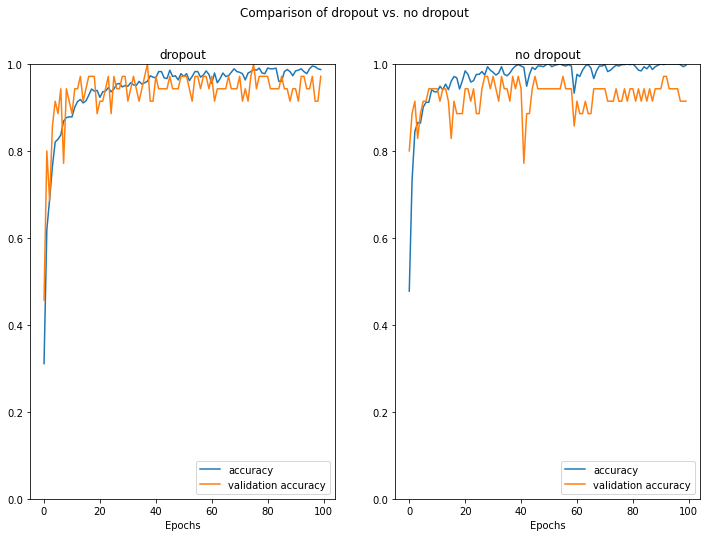

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12, 8))
fig.suptitle('Comparison of dropout vs. no dropout')

ax[0].plot(history4.history['accuracy'], label='accuracy')
ax[0].plot(history4.history['val_accuracy'], label='validation accuracy')
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].legend(loc="lower right")
ax[0].set_title("dropout")

ax[1].plot(history6.history['accuracy'], label='accuracy')
ax[1].plot(history6.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].legend(loc="lower right")
ax[1].set_title("no dropout")

fig.show()

# Quantity of layers, Adam optimizer

In [6]:
# few layers, Adam optimizer
# MODEL --------------------------------------------------

model7 = Sequential()
model7.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Flatten())
model7.add(Dense(7, activation='softmax'))

model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history7 = model7.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model7.save("models/few_adam")

Epoch 1/100
32/32 [==============================] - 13s 420ms/step - loss: 3.3935 - accuracy: 0.4359 - val_loss: 0.8185 - val_accuracy: 0.6571
Epoch 2/100
32/32 [==============================] - 13s 402ms/step - loss: 0.6863 - accuracy: 0.7500 - val_loss: 0.3587 - val_accuracy: 0.9429
Epoch 3/100
32/32 [==============================] - 13s 394ms/step - loss: 0.4679 - accuracy: 0.8333 - val_loss: 0.2506 - val_accuracy: 0.9143
Epoch 4/100
32/32 [==============================] - 13s 398ms/step - loss: 0.3633 - accuracy: 0.8590 - val_loss: 0.1563 - val_accuracy: 0.9429
Epoch 5/100
32/32 [==============================] - 13s 398ms/step - loss: 0.3328 - accuracy: 0.8926 - val_loss: 0.1470 - val_accuracy: 0.9714
Epoch 6/100
32/32 [==============================] - 13s 409ms/step - loss: 0.2954 - accuracy: 0.9006 - val_loss: 0.1689 - val_accuracy: 0.9429
Epoch 7/100
32/32 [==============================] - 13s 396ms/step - loss: 0.3340 - accuracy: 0.8814 - val_loss: 0.1682 - val_accuracy:

In [7]:
# many layers, Adam optimizer
# MODEL --------------------------------------------------

model8 = Sequential()
model8.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))
model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Flatten())
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.25))
model8.add(Dense(7, activation='softmax'))

model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history8 = model8.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model8.save("models/many_adam")

Epoch 1/100
32/32 [==============================] - 28s 870ms/step - loss: 1.6687 - accuracy: 0.3317 - val_loss: 0.9893 - val_accuracy: 0.5714
Epoch 2/100
32/32 [==============================] - 27s 838ms/step - loss: 0.9413 - accuracy: 0.6170 - val_loss: 0.6450 - val_accuracy: 0.7143
Epoch 3/100
32/32 [==============================] - 27s 840ms/step - loss: 0.6645 - accuracy: 0.7484 - val_loss: 0.4534 - val_accuracy: 0.8571
Epoch 4/100
32/32 [==============================] - 27s 851ms/step - loss: 0.5475 - accuracy: 0.7821 - val_loss: 0.4921 - val_accuracy: 0.7714
Epoch 5/100
32/32 [==============================] - 26s 828ms/step - loss: 0.4608 - accuracy: 0.8061 - val_loss: 0.3337 - val_accuracy: 0.8857
Epoch 6/100
32/32 [==============================] - 27s 851ms/step - loss: 0.4463 - accuracy: 0.8317 - val_loss: 0.2700 - val_accuracy: 0.8857
Epoch 7/100
32/32 [==============================] - 27s 831ms/step - loss: 0.4052 - accuracy: 0.8558 - val_loss: 0.3662 - val_accuracy:

c:\users\azawa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


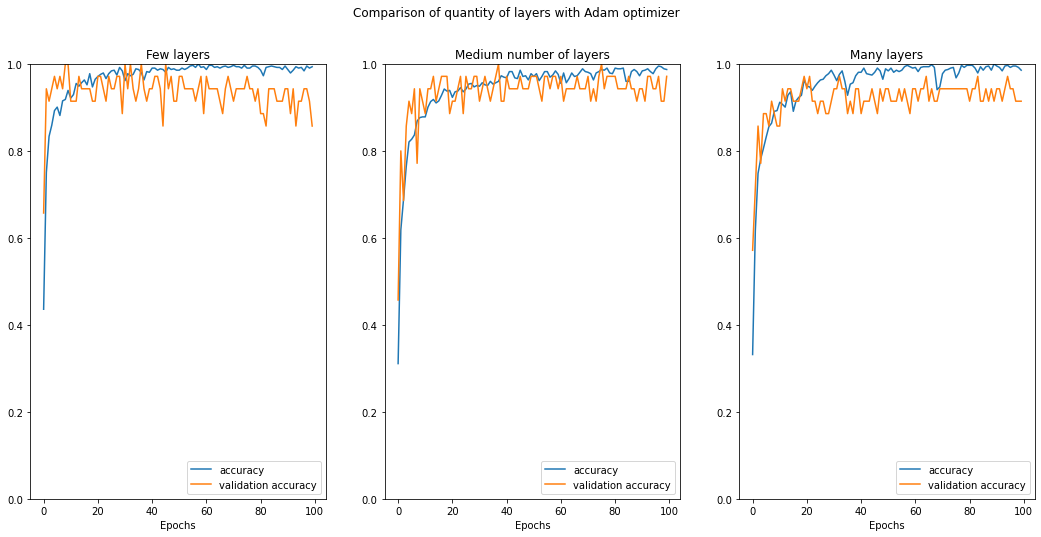

In [8]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
fig.suptitle('Comparison of quantity of layers with Adam optimizer')

ax[0].plot(history7.history['accuracy'], label='accuracy')
ax[0].plot(history7.history['val_accuracy'], label='validation accuracy')
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].legend(loc="lower right")
ax[0].set_title("Few layers")

ax[1].plot(history4.history['accuracy'], label='accuracy')
ax[1].plot(history4.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].legend(loc="lower right")
ax[1].set_title("Medium number of layers")

ax[2].plot(history8.history['accuracy'], label='accuracy')
ax[2].plot(history8.history['val_accuracy'], label='validation accuracy')
ax[2].set_ylim([0, 1])
ax[2].set_xlabel('Epochs')
ax[2].legend(loc="lower right")
ax[2].set_title("Many layers")

fig.show()

# Learning rate

In [2]:
# few layers, Adam optimizer, lr 0.1
# MODEL --------------------------------------------------

model9 = Sequential()
model9.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Flatten())
model9.add(Dense(7, activation='softmax'))

model9.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.1),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history9 = model9.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model9.save("models/few_adam_lr_0.1")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
32/32 [==============================] - 13s 418ms/step - loss: 115.4368 - accuracy: 0.1699 - val_loss: 1.9698 - val_accuracy: 0.1429
Epoch 2/100
32/32 [==============================] - 15s 470ms/step - loss: 1.9393 - accuracy: 0.1859 - val_loss: 1.9628 - val_accuracy: 0.1429
Epoch 3/100
32/32 [==============================] - 14s 423ms/step - loss: 1.9445 - accuracy: 0.1042 - val_loss: 1.9790 - val_accuracy: 0.1429
Epoch 4/100
32/32 [==============================] - 14s 434ms/step - loss: 1.9539 - accuracy: 0.1571 - val_loss: 1.9609 - val_accuracy: 0.1429
Epoch 5/100
32/32 [==============================] - 16s 508ms/step - loss: 1.9438 - accuracy: 0.1859 - val_loss: 1.9586 - val_accuracy: 0.1429
Epoch 6/100
32/32 [==============================] - 21s 643ms/step - loss: 1.9492 - accuracy: 0.1747 - val_loss: 1.9545 - val_accuracy: 0.1429
Epoch 7/100
32/32 [==============================] - 17s 5

Epoch 56/100
32/32 [==============================] - 14s 423ms/step - loss: 1.9584 - accuracy: 0.1859 - val_loss: 1.9529 - val_accuracy: 0.1429
Epoch 57/100
32/32 [==============================] - 14s 431ms/step - loss: 1.9452 - accuracy: 0.1731 - val_loss: 1.9874 - val_accuracy: 0.1429
Epoch 58/100
32/32 [==============================] - 14s 439ms/step - loss: 1.9489 - accuracy: 0.1651 - val_loss: 1.9868 - val_accuracy: 0.1429
Epoch 59/100
32/32 [==============================] - 15s 465ms/step - loss: 1.9435 - accuracy: 0.1571 - val_loss: 1.9576 - val_accuracy: 0.1429
Epoch 60/100
32/32 [==============================] - 13s 409ms/step - loss: 1.9421 - accuracy: 0.1827 - val_loss: 1.9581 - val_accuracy: 0.1429
Epoch 61/100
32/32 [==============================] - 12s 383ms/step - loss: 1.9571 - accuracy: 0.1522 - val_loss: 1.9710 - val_accuracy: 0.1429
Epoch 62/100
32/32 [==============================] - 12s 386ms/step - loss: 1.9434 - accuracy: 0.1859 - val_loss: 1.9638 - val_ac

In [3]:
# few layers, Adam optimizer, lr 0.03
# MODEL --------------------------------------------------

model10 = Sequential()
model10.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Flatten())
model10.add(Dense(7, activation='softmax'))

model10.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history10 = model10.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model10.save("models/few_adam_lr_0.03")

Epoch 1/100
32/32 [==============================] - 15s 482ms/step - loss: 24.0532 - accuracy: 0.1554 - val_loss: 1.9527 - val_accuracy: 0.1429
Epoch 2/100
32/32 [==============================] - 14s 427ms/step - loss: 1.9415 - accuracy: 0.1474 - val_loss: 1.9581 - val_accuracy: 0.1429
Epoch 3/100
32/32 [==============================] - 14s 422ms/step - loss: 1.9356 - accuracy: 0.1859 - val_loss: 1.9599 - val_accuracy: 0.1429
Epoch 4/100
32/32 [==============================] - 14s 423ms/step - loss: 1.9356 - accuracy: 0.1859 - val_loss: 1.9596 - val_accuracy: 0.1429
Epoch 5/100
32/32 [==============================] - 14s 423ms/step - loss: 1.9339 - accuracy: 0.1859 - val_loss: 1.9629 - val_accuracy: 0.1429
Epoch 6/100
32/32 [==============================] - 14s 441ms/step - loss: 1.9356 - accuracy: 0.1859 - val_loss: 1.9661 - val_accuracy: 0.1429
Epoch 7/100
32/32 [==============================] - 14s 434ms/step - loss: 1.9346 - accuracy: 0.1859 - val_loss: 1.9590 - val_accuracy

In [4]:
# few layers, Adam optimizer, lr 0.01
# MODEL --------------------------------------------------

model11 = Sequential()
model11.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model11.add(MaxPooling2D(pool_size=(2, 2)))
model11.add(Flatten())
model11.add(Dense(7, activation='softmax'))

model11.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history11 = model11.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model11.save("models/few_adam_lr_0.01")

Epoch 1/100
32/32 [==============================] - 14s 431ms/step - loss: 9.3570 - accuracy: 0.2436 - val_loss: 1.9362 - val_accuracy: 0.2571
Epoch 2/100
32/32 [==============================] - 14s 425ms/step - loss: 1.4467 - accuracy: 0.4824 - val_loss: 1.7066 - val_accuracy: 0.4000
Epoch 3/100
32/32 [==============================] - 13s 419ms/step - loss: 1.3544 - accuracy: 0.5080 - val_loss: 1.4184 - val_accuracy: 0.4571
Epoch 4/100
32/32 [==============================] - 14s 427ms/step - loss: 1.2559 - accuracy: 0.5497 - val_loss: 1.5667 - val_accuracy: 0.4571
Epoch 5/100
32/32 [==============================] - 13s 417ms/step - loss: 1.3321 - accuracy: 0.5288 - val_loss: 1.3855 - val_accuracy: 0.4857
Epoch 6/100
32/32 [==============================] - 14s 427ms/step - loss: 1.2363 - accuracy: 0.5753 - val_loss: 1.2862 - val_accuracy: 0.5429
Epoch 7/100
32/32 [==============================] - 14s 442ms/step - loss: 1.2309 - accuracy: 0.5625 - val_loss: 1.7152 - val_accuracy:

In [5]:
# few layers, Adam optimizer, lr 0.003
# MODEL --------------------------------------------------

model12 = Sequential()
model12.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model12.add(MaxPooling2D(pool_size=(2, 2)))
model12.add(Flatten())
model12.add(Dense(7, activation='softmax'))

model12.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.003),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history12 = model12.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model12.save("models/few_adam_lr_0.003")

Epoch 1/100
32/32 [==============================] - 14s 446ms/step - loss: 3.1723 - accuracy: 0.4840 - val_loss: 0.7688 - val_accuracy: 0.7429
Epoch 2/100
32/32 [==============================] - 16s 487ms/step - loss: 0.6830 - accuracy: 0.7772 - val_loss: 0.7127 - val_accuracy: 0.7429
Epoch 3/100
32/32 [==============================] - 14s 435ms/step - loss: 0.6285 - accuracy: 0.7949 - val_loss: 0.6565 - val_accuracy: 0.8000
Epoch 4/100
32/32 [==============================] - 15s 466ms/step - loss: 0.4943 - accuracy: 0.8285 - val_loss: 0.5931 - val_accuracy: 0.8286
Epoch 5/100
32/32 [==============================] - 14s 439ms/step - loss: 0.4488 - accuracy: 0.8542 - val_loss: 0.2559 - val_accuracy: 0.8857
Epoch 6/100
32/32 [==============================] - 13s 413ms/step - loss: 0.3998 - accuracy: 0.8638 - val_loss: 0.2686 - val_accuracy: 0.9429
Epoch 7/100
32/32 [==============================] - 13s 414ms/step - loss: 0.4328 - accuracy: 0.8718 - val_loss: 0.2898 - val_accuracy:

In [6]:
# few layers, Adam optimizer, lr 0.001
# MODEL --------------------------------------------------

model13 = Sequential()
model13.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model13.add(MaxPooling2D(pool_size=(2, 2)))
model13.add(Flatten())
model13.add(Dense(7, activation='softmax'))

model13.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.003),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history13 = model13.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model13.save("models/few_adam_lr_0.001")

Epoch 1/100
32/32 [==============================] - 15s 457ms/step - loss: 5.8040 - accuracy: 0.3942 - val_loss: 1.0720 - val_accuracy: 0.5429
Epoch 2/100
32/32 [==============================] - 14s 435ms/step - loss: 0.9239 - accuracy: 0.6635 - val_loss: 0.6112 - val_accuracy: 0.7143
Epoch 3/100
32/32 [==============================] - 15s 454ms/step - loss: 0.7601 - accuracy: 0.7356 - val_loss: 0.3840 - val_accuracy: 0.8857
Epoch 4/100
32/32 [==============================] - 14s 445ms/step - loss: 0.6311 - accuracy: 0.7804 - val_loss: 0.4251 - val_accuracy: 0.8857
Epoch 5/100
32/32 [==============================] - 14s 441ms/step - loss: 0.5743 - accuracy: 0.8045 - val_loss: 0.3195 - val_accuracy: 0.8571
Epoch 6/100
32/32 [==============================] - 14s 435ms/step - loss: 0.5185 - accuracy: 0.8221 - val_loss: 0.2909 - val_accuracy: 0.9143
Epoch 7/100
32/32 [==============================] - 14s 437ms/step - loss: 0.4550 - accuracy: 0.8429 - val_loss: 0.2905 - val_accuracy:

c:\users\azawa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


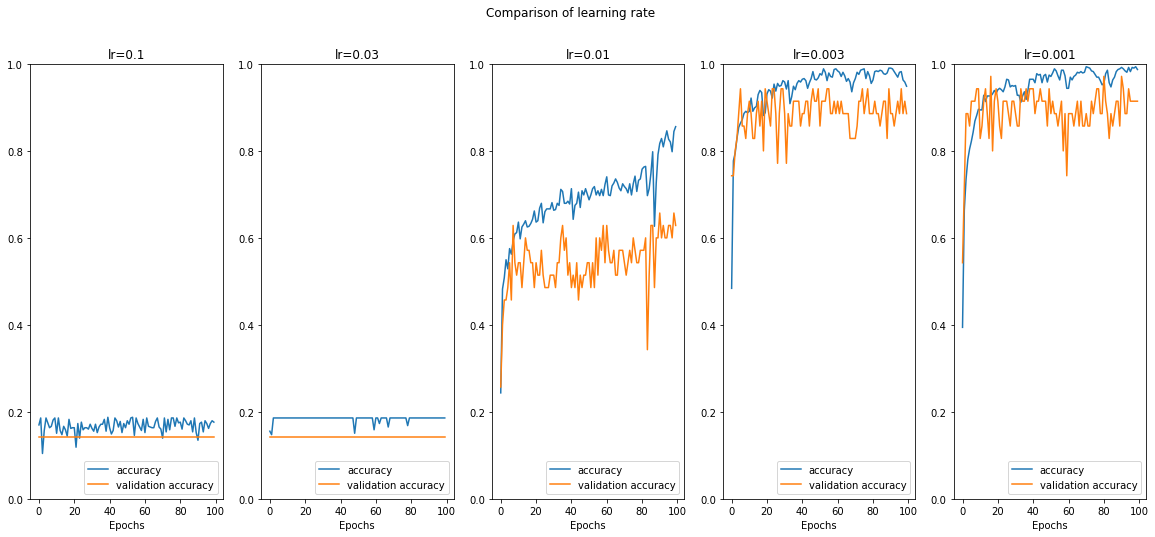

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Comparison of learning rate')

ax[0].plot(history9.history['accuracy'], label='accuracy')
ax[0].plot(history9.history['val_accuracy'], label='validation accuracy')
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].legend(loc="lower right")
ax[0].set_title("lr=0.1")

ax[1].plot(history10.history['accuracy'], label='accuracy')
ax[1].plot(history10.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].legend(loc="lower right")
ax[1].set_title("lr=0.03")

ax[2].plot(history11.history['accuracy'], label='accuracy')
ax[2].plot(history11.history['val_accuracy'], label='validation accuracy')
ax[2].set_ylim([0, 1])
ax[2].set_xlabel('Epochs')
ax[2].legend(loc="lower right")
ax[2].set_title("lr=0.01")

ax[3].plot(history12.history['accuracy'], label='accuracy')
ax[3].plot(history12.history['val_accuracy'], label='validation accuracy')
ax[3].set_ylim([0, 1])
ax[3].set_xlabel('Epochs')
ax[3].legend(loc="lower right")
ax[3].set_title("lr=0.003")

ax[4].plot(history13.history['accuracy'], label='accuracy')
ax[4].plot(history13.history['val_accuracy'], label='validation accuracy')
ax[4].set_ylim([0, 1])
ax[4].set_xlabel('Epochs')
ax[4].legend(loc="lower right")
ax[4].set_title("lr=0.001")

fig.show()

# Datagen parameters

In [18]:
# few layers, Adam optimizer, no effect datagen
# MODEL --------------------------------------------------

model14 = Sequential()
model14.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model14.add(MaxPooling2D(pool_size=(2, 2)))
model14.add(Flatten())
model14.add(Dense(7, activation='softmax'))

model14.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history14 = model14.fit_generator(
        no_effect_data_train,
        epochs=epochs,
        validation_data=data_validation
)

model14.save("models/few_adam_no_effect_datagen")

Epoch 1/100
32/32 [==============================] - 9s 295ms/step - loss: 3.9017 - accuracy: 0.4103 - val_loss: 0.6748 - val_accuracy: 0.7429
Epoch 2/100
32/32 [==============================] - 9s 286ms/step - loss: 0.4545 - accuracy: 0.8702 - val_loss: 0.3522 - val_accuracy: 0.8571
Epoch 3/100
32/32 [==============================] - 9s 275ms/step - loss: 0.1560 - accuracy: 0.9535 - val_loss: 0.3455 - val_accuracy: 0.8857
Epoch 4/100
32/32 [==============================] - 9s 285ms/step - loss: 0.0612 - accuracy: 0.9888 - val_loss: 0.3032 - val_accuracy: 0.8857
Epoch 5/100
32/32 [==============================] - 9s 272ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.2970 - val_accuracy: 0.9143
Epoch 6/100
32/32 [==============================] - 9s 275ms/step - loss: 0.0133 - accuracy: 0.9984 - val_loss: 0.2801 - val_accuracy: 0.9143
Epoch 7/100
32/32 [==============================] - 9s 288ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.3056 - val_accuracy: 0.8857

Epoch 57/100
32/32 [==============================] - 9s 274ms/step - loss: 8.7411e-05 - accuracy: 1.0000 - val_loss: 0.3746 - val_accuracy: 0.9143
Epoch 58/100
32/32 [==============================] - 9s 292ms/step - loss: 8.4293e-05 - accuracy: 1.0000 - val_loss: 0.3756 - val_accuracy: 0.9143
Epoch 59/100
32/32 [==============================] - 9s 272ms/step - loss: 8.1538e-05 - accuracy: 1.0000 - val_loss: 0.3738 - val_accuracy: 0.9143
Epoch 60/100
32/32 [==============================] - 9s 281ms/step - loss: 7.8414e-05 - accuracy: 1.0000 - val_loss: 0.3723 - val_accuracy: 0.9143
Epoch 61/100
32/32 [==============================] - 9s 273ms/step - loss: 7.5903e-05 - accuracy: 1.0000 - val_loss: 0.3764 - val_accuracy: 0.9143
Epoch 62/100
32/32 [==============================] - 9s 274ms/step - loss: 7.3165e-05 - accuracy: 1.0000 - val_loss: 0.3780 - val_accuracy: 0.9143
Epoch 63/100
32/32 [==============================] - 9s 276ms/step - loss: 7.0756e-05 - accuracy: 1.0000 - val_

In [10]:
# few layers, Adam optimizer, large effect datagen
# MODEL --------------------------------------------------

model15 = Sequential()
model15.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model15.add(MaxPooling2D(pool_size=(2, 2)))
model15.add(Flatten())
model15.add(Dense(7, activation='softmax'))

model15.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history15 = model15.fit_generator(
        large_effect_data_train,
        epochs=epochs,
        validation_data=data_validation
)

model15.save("models/few_adam_large_effect_datagen")

Epoch 1/100
32/32 [==============================] - 13s 412ms/step - loss: 3.2635 - accuracy: 0.3974 - val_loss: 0.9648 - val_accuracy: 0.5714
Epoch 2/100
32/32 [==============================] - 13s 398ms/step - loss: 1.0050 - accuracy: 0.6122 - val_loss: 0.6479 - val_accuracy: 0.7429
Epoch 3/100
32/32 [==============================] - 13s 409ms/step - loss: 0.8427 - accuracy: 0.6939 - val_loss: 0.5160 - val_accuracy: 0.8571
Epoch 4/100
32/32 [==============================] - 13s 407ms/step - loss: 0.8004 - accuracy: 0.7083 - val_loss: 0.5292 - val_accuracy: 0.8286
Epoch 5/100
32/32 [==============================] - 14s 431ms/step - loss: 0.7328 - accuracy: 0.7115 - val_loss: 0.5154 - val_accuracy: 0.8286
Epoch 6/100
32/32 [==============================] - 15s 457ms/step - loss: 0.6765 - accuracy: 0.7580 - val_loss: 0.4752 - val_accuracy: 0.8857
Epoch 7/100
32/32 [==============================] - 15s 481ms/step - loss: 0.6177 - accuracy: 0.7772 - val_loss: 0.4436 - val_accuracy:

c:\users\azawa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


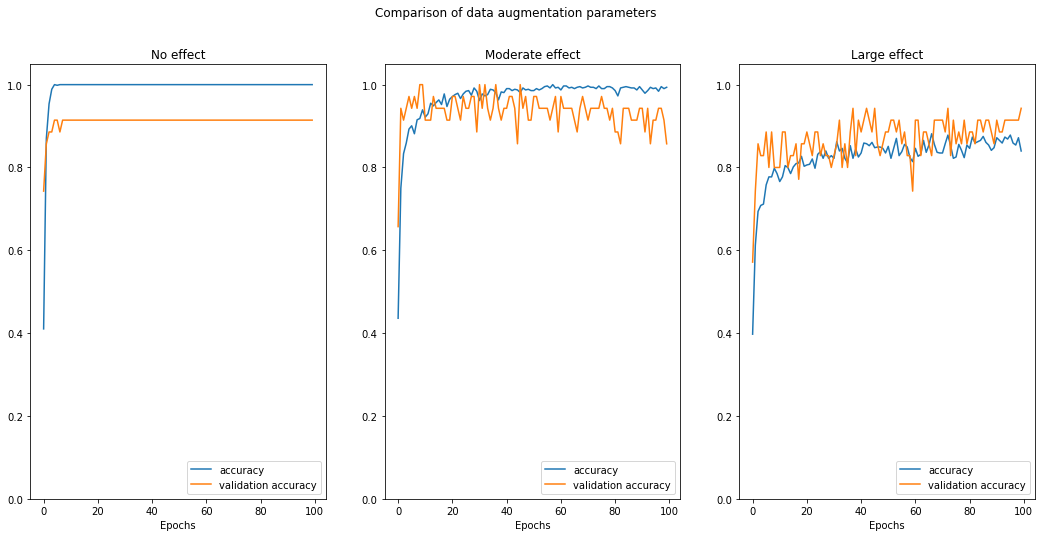

In [20]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
fig.suptitle('Comparison of data augmentation parameters')

ax[0].plot(history14.history['accuracy'], label='accuracy')
ax[0].plot(history14.history['val_accuracy'], label='validation accuracy')
ax[0].set_ylim([0, 1.05])
ax[0].set_xlabel('Epochs')
ax[0].legend(loc="lower right")
ax[0].set_title("No effect")

ax[1].plot(history7.history['accuracy'], label='accuracy')
ax[1].plot(history7.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim([0, 1.05])
ax[1].set_xlabel('Epochs')
ax[1].legend(loc="lower right")
ax[1].set_title("Moderate effect")

ax[2].plot(history15.history['accuracy'], label='accuracy')
ax[2].plot(history15.history['val_accuracy'], label='validation accuracy')
ax[2].set_ylim([0, 1.05])
ax[2].set_xlabel('Epochs')
ax[2].legend(loc="lower right")
ax[2].set_title("Large effect")

fig.show()

# Kernel

In [12]:
# few layers, Adam optimizer, kernel 5x5
# MODEL --------------------------------------------------

model16 = Sequential()
model16.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model16.add(MaxPooling2D(pool_size=(2, 2)))
model16.add(Flatten())
model16.add(Dense(7, activation='softmax'))

model16.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history16 = model16.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model16.save("models/few_adam_kernel_5x5")

Epoch 1/100
32/32 [==============================] - 15s 473ms/step - loss: 5.2144 - accuracy: 0.3221 - val_loss: 1.2305 - val_accuracy: 0.4286
Epoch 2/100
32/32 [==============================] - 15s 463ms/step - loss: 1.0484 - accuracy: 0.6298 - val_loss: 0.8468 - val_accuracy: 0.6000
Epoch 3/100
32/32 [==============================] - 15s 475ms/step - loss: 0.6528 - accuracy: 0.7676 - val_loss: 0.4093 - val_accuracy: 0.8000
Epoch 4/100
32/32 [==============================] - 15s 461ms/step - loss: 0.5233 - accuracy: 0.8029 - val_loss: 0.4524 - val_accuracy: 0.8286
Epoch 5/100
32/32 [==============================] - 17s 540ms/step - loss: 0.4470 - accuracy: 0.8429 - val_loss: 0.4022 - val_accuracy: 0.8857
Epoch 6/100
32/32 [==============================] - 17s 516ms/step - loss: 0.3871 - accuracy: 0.8734 - val_loss: 0.3723 - val_accuracy: 0.8286
Epoch 7/100
32/32 [==============================] - 17s 530ms/step - loss: 0.3208 - accuracy: 0.8942 - val_loss: 0.2909 - val_accuracy:

In [13]:
# few layers, Adam optimizer, kernel 7x7
# MODEL --------------------------------------------------

model17 = Sequential()
model17.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model17.add(MaxPooling2D(pool_size=(2, 2)))
model17.add(Flatten())
model17.add(Dense(7, activation='softmax'))

model17.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history17 = model17.fit_generator(
        data_train,
        epochs=epochs,
        validation_data=data_validation
)

model17.save("models/few_adam_kernel_7x7")

Epoch 1/100
32/32 [==============================] - 19s 588ms/step - loss: 3.0062 - accuracy: 0.3670 - val_loss: 0.9356 - val_accuracy: 0.6000
Epoch 2/100
32/32 [==============================] - 18s 566ms/step - loss: 0.8410 - accuracy: 0.6891 - val_loss: 0.6313 - val_accuracy: 0.7429
Epoch 3/100
32/32 [==============================] - 18s 563ms/step - loss: 0.6547 - accuracy: 0.7612 - val_loss: 0.3303 - val_accuracy: 0.8857
Epoch 4/100
32/32 [==============================] - 18s 565ms/step - loss: 0.5054 - accuracy: 0.8333 - val_loss: 0.3883 - val_accuracy: 0.8000
Epoch 5/100
32/32 [==============================] - 18s 576ms/step - loss: 0.4212 - accuracy: 0.8638 - val_loss: 0.2861 - val_accuracy: 0.8857
Epoch 6/100
32/32 [==============================] - 18s 571ms/step - loss: 0.3860 - accuracy: 0.8766 - val_loss: 0.2147 - val_accuracy: 0.9143
Epoch 7/100
32/32 [==============================] - 18s 565ms/step - loss: 0.3619 - accuracy: 0.8894 - val_loss: 0.1985 - val_accuracy:

c:\users\azawa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


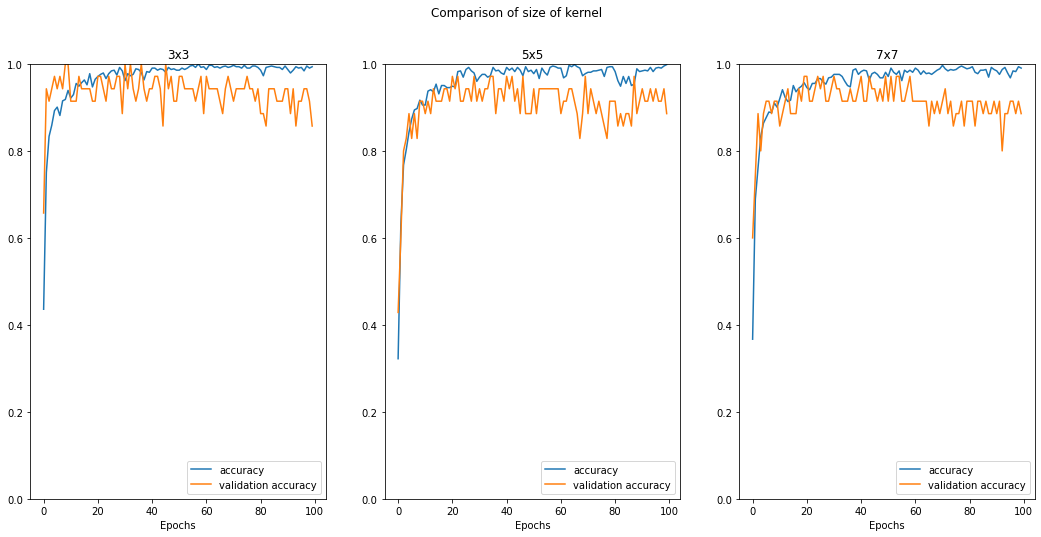

In [14]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
fig.suptitle('Comparison of size of kernel')

ax[0].plot(history7.history['accuracy'], label='accuracy')
ax[0].plot(history7.history['val_accuracy'], label='validation accuracy')
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('Epochs')
ax[0].legend(loc="lower right")
ax[0].set_title("3x3")

ax[1].plot(history16.history['accuracy'], label='accuracy')
ax[1].plot(history16.history['val_accuracy'], label='validation accuracy')
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Epochs')
ax[1].legend(loc="lower right")
ax[1].set_title("5x5")

ax[2].plot(history17.history['accuracy'], label='accuracy')
ax[2].plot(history17.history['val_accuracy'], label='validation accuracy')
ax[2].set_ylim([0, 1])
ax[2].set_xlabel('Epochs')
ax[2].legend(loc="lower right")
ax[2].set_title("7x7")

fig.show()

Found 624 images belonging to 7 classes.
Found 624 images belonging to 7 classes.
Found 624 images belonging to 7 classes.


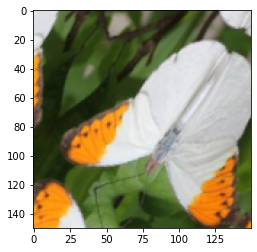

[[0. 0. 0. 1. 0. 0. 0.]]


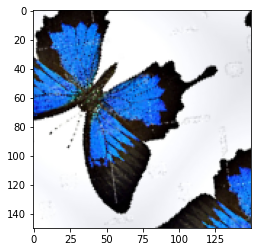

[[0. 0. 0. 0. 0. 0. 1.]]


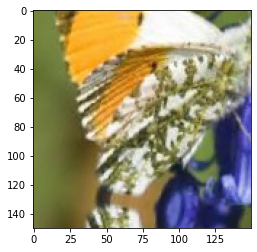

[[0. 0. 0. 1. 0. 0. 0.]]


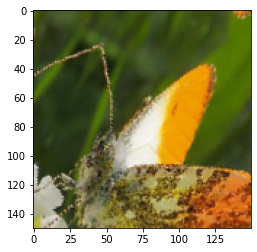

[[0. 0. 0. 1. 0. 0. 0.]]


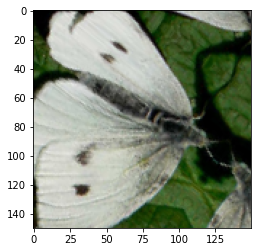

[[0. 1. 0. 0. 0. 0. 0.]]


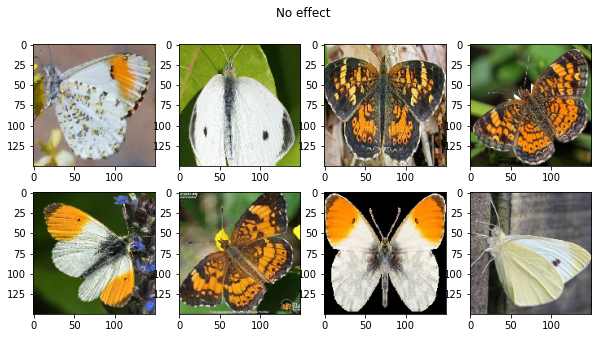

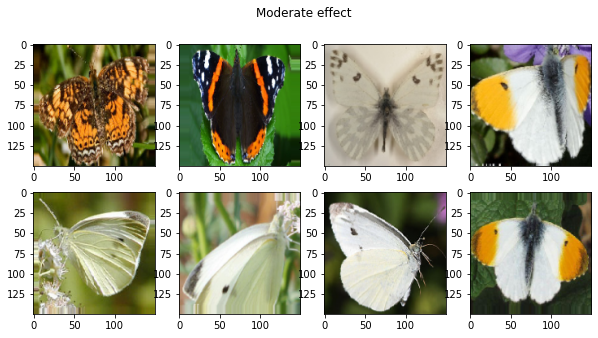

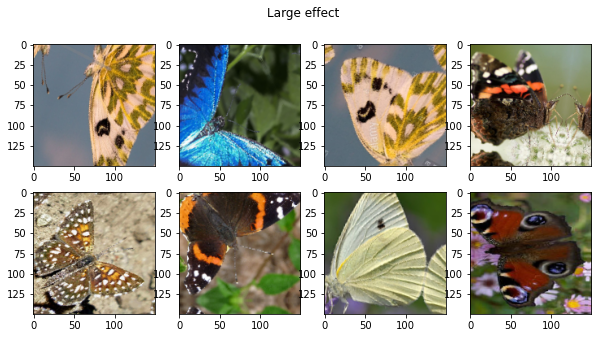

In [15]:
import matplotlib.pyplot as plt
import numpy as np

sample_no_effect = no_effect_datagen.flow_from_directory(
        train_data_dir + "/train",
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

sample_moderate_effect = train_datagen.flow_from_directory(
        train_data_dir + "/train",
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

sample_large_effect = large_effect_datagen.flow_from_directory(
        train_data_dir + "/train",
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

fig1 = plt.figure(figsize=(10, 5))
fig1.suptitle("No effect")
for i in range(1,9):
    image = sample_no_effect.next()[0]
    fig1.add_subplot(2, 4, i)
    plt.imshow(image.reshape(150, 150, 3))
plt.show()

fig2 = plt.figure(figsize=(10, 5))
fig2.suptitle("Moderate effect")
for i in range(1,9):
    image = sample_moderate_effect.next()[0]
    fig2.add_subplot(2, 4, i)
    plt.imshow(image.reshape(150, 150, 3))
plt.show()

fig3 = plt.figure(figsize=(10, 5))
fig3.suptitle("Large effect")
for i in range(1,9):
    image = sample_large_effect.next()[0]
    fig3.add_subplot(2, 4, i)
    plt.imshow(image.reshape(150, 150, 3))
plt.show()

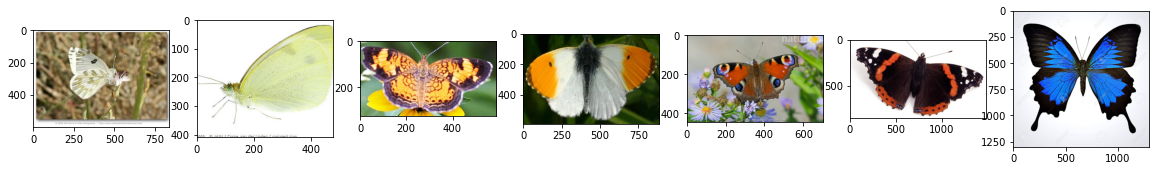

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

butterflies = ['beckers white/001.jpg', 'cabbage white/01..jpg', 'crecent/01..jpg', 'orange tip/01.jpg', 'peacock/01..jpg', 'red admiral/01..jpg', 'ulyses/01..jpg']
fig = plt.figure(figsize=(20, 5))
for i in range(1, 8):
    fig.add_subplot(1, 7, i)
    plt.imshow(Image.open('butterflies/train/' + butterflies[i-1]))
plt.show()

Found 1 images belonging to 1 classes.


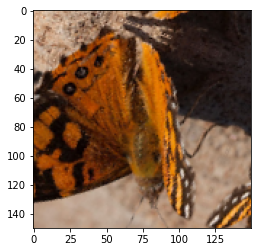

[[1.]]


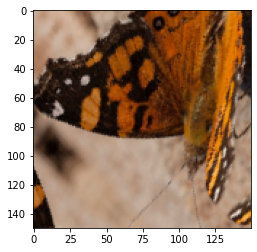

[[1.]]


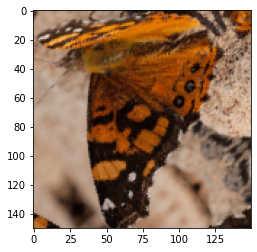

[[1.]]


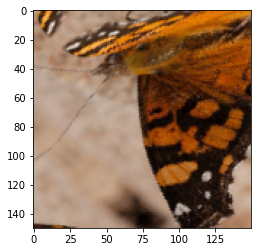

[[1.]]


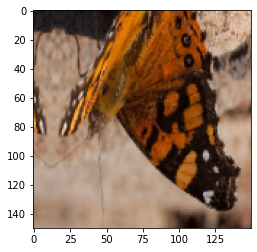

[[1.]]


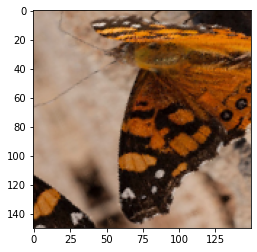

[[1.]]


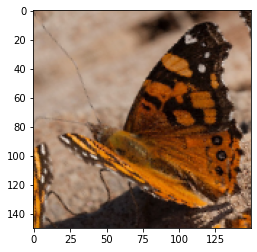

[[1.]]


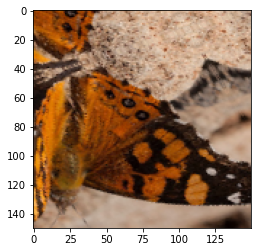

[[1.]]


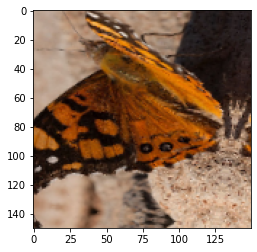

[[1.]]


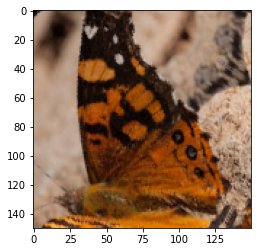

[[1.]]


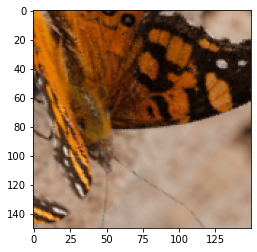

[[1.]]


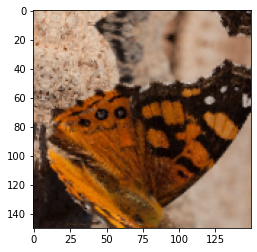

[[1.]]


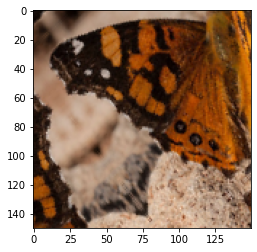

[[1.]]


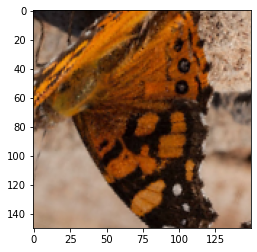

[[1.]]


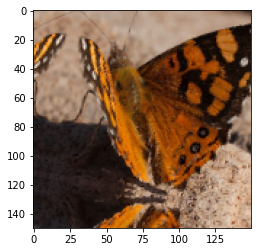

[[1.]]


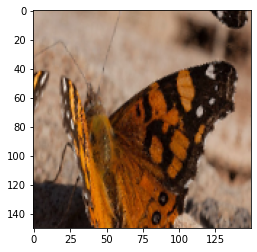

[[1.]]


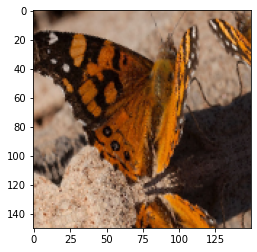

[[1.]]


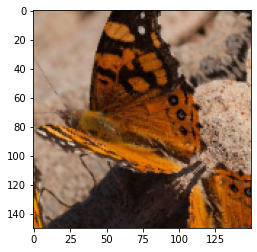

[[1.]]


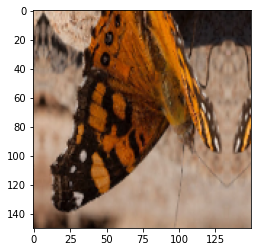

[[1.]]


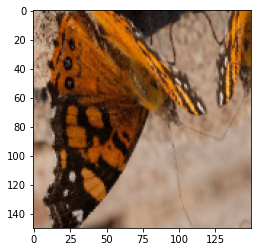

[[1.]]


In [22]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rotation_range=90,
        fill_mode="reflect")

sample = datagen.flow_from_directory(
        train_data_dir + "/t",
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

print(sample)


for i in range(20):
    
    data = sample.next()
    plt.imshow(data[0].reshape(150, 150, 3))
    plt.show()
    print(data[1])